In [1]:
import numpy as np
import copy
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.path as mpath
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
V= 100
v = 1
x = 25
N = 5
T = 5000
beta = 1
t = np.arange(1, T + 1)
G = 1 #processing gain
phi = 30
# Processing Gain K = linspace(0.9, 1.1, T) %%%%%(equ.3)
K = np.linspace(0.9, 1.1, T)
c = 5*10**-4  # Define the value of c

k = 1
# max collecting rate Cmax %%%%%(equ.1)
Rmax = 50
# max Tx power (watt)Pmax %%%%%(equ.2)
Pmax = 0.02
# The harvested heat from static energy source is a constant (Body temp)
e = 8
# The energy consumption of collecting data is a linear function of cn(t) and is denoted by ?cn(t). %%%%%%(equ.4)
lambda_ = 250 * 10**-4
# Mmax is max energy harvested from dynamyic energy source (movment)
Mmax = 29 * 10**-6
# mt the energy harvested from dynamyic energy source (movment) we set the
# movment of the patient [0,3000]
mt = np.random.uniform(0, 3, T)
# ht the energy harvesting rate of all sensors are distributed between [8W,15.5W]
# h(t) = unifrnd(8,15.5)
# The upper bound of any sensor’s energy consumption a-max = ?*Cmax+Pmax. %%%%%(equ.4)
amax = 0.04
dmax = 3

In [3]:
Omega=(V*v/c)+amax
Rt = np.linspace(0, Rmax)

In [4]:
# [7,8] min max EEG signal
S_EEG = np.random.randint(7, 9, 1)
# [48,100] min max ECG signal
S_ECG = np.random.randint(48, 101, 1)
# [36,40] min max Temperature
S_Temp = np.random.randint(36, 41, 1)
# Blood Pressure
S_Pres = np.random.randint(90, 121, 1)
# Blood Sugar Rate
S_Sug = np.random.randint(140, 200, 1)

Rmax = 40

# initial matrix of all sensor data
Wt = np.array([S_EEG, S_ECG, S_Temp, S_Pres, S_Sug])

# [0,0.005] min max 500mV EEG power
EEGv = np.random.uniform(0, 0.005)
# [0.001,0.005] min max ECG power The voltage is in the range of 1 mV ~ 5 mV.
ECGv = np.random.uniform(0.001, 0.005)
# [0.001,0.004] min max Temp power The voltage is in the range of 1 mV ~ 4 mV.
Tempv = np.random.uniform(0.001, 0.004)
# [0.001,0.003] min max Pres power The voltage is in the range of 1 mV ~ 3 mV.
Presv = np.random.uniform(0.001, 0.003)
# [0.7,0.110] min max Sug power The voltage is in the range of 700 mV ~ 1100 mV.
Sugv = np.random.uniform(0.7, 0.9)

a_n = np.linspace(0, amax, N)
# initial matrix of all sensor Energy
Kt = np.array([EEGv, ECGv, Tempv, Presv, Sugv])

In [5]:
Khat = Omega - Kt.T
Wtx = Wt.T * x  # Assuming x is already defined
o = np.min(c * Khat * x) + Wtx - (V * np.log10(1 + x))

In [6]:
f_t = np.linspace(0.9,1.1) * phi ** -4
dn = np.linspace(0,dmax ,T)
rn = np.linspace(0, Rmax, T)

In [7]:
eta_t = np.log(G * c) 

In [8]:
H_star = []
m_n = []
Mn = 0
epsilon = 2
for i in range(N):
    for j in range(T):
        if Omega > 0:
            Mn = max((Mn+1*(epsilon - eta_t - dn[j])),0)
        else:
            Mn = max((Mn-1*(eta_t - dn[j])), 0)
        if Kt[i] < Omega:
            h_star = min((Omega - K[j]), G)
        else:
            h_star = 0
        m_n.append(Mn)
        H_star.append(h_star)

In [9]:
O = []
braket = []
for i in range(N):
    for j in range(T):
        O.append(np.log(1+ rn[j]) - v* beta * dn[j])
        k_hat = Omega - K[j]   
        braket.append((k_hat * c + Wt[i])/V)
O = np.diff(O)
O = np.append(O, 0)

a_len = max(O.shape)
a_len_sqrt = int(np.sqrt(a_len))
a = O[:(158*158)].reshape((a_len_sqrt, a_len_sqrt))

O_inv = np.linalg.inv(a)
r_star = O_inv @ np.clip(np.array([x[0] for x in braket][:24964]).reshape((a_len_sqrt, a_len_sqrt)), 0, Rmax)

In [10]:
Wt = [x[0] for x in Wt]

In [11]:
a_star = []
for i in range(N):
    for j in range(T):
        value =K[j] / (Wt[i] + mt[j]*rn[j])
        rndd = np.random.random()
        a_star.append(np.clip(np.log(value), rndd, amax))

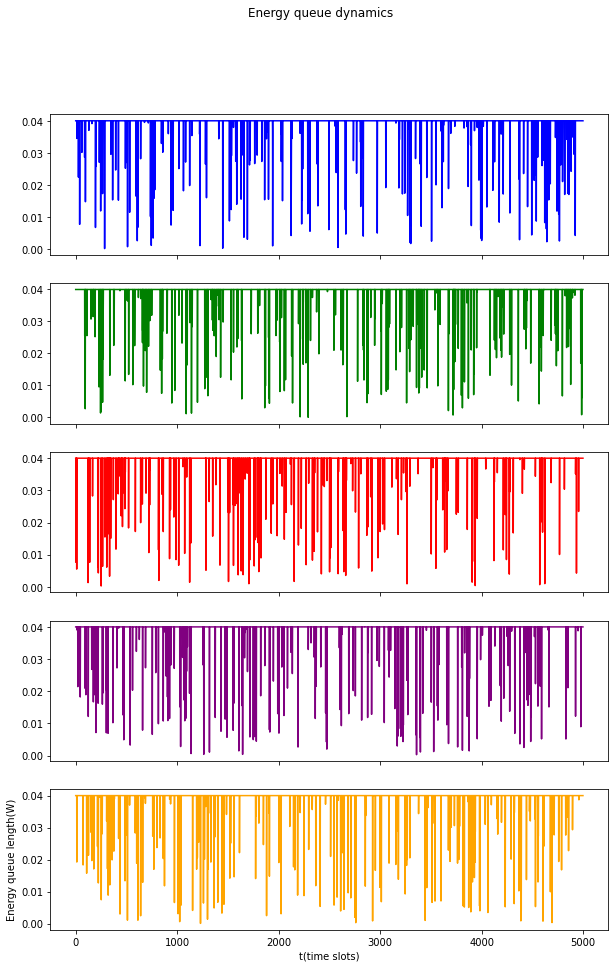

In [12]:
import matplotlib.mlab as mlab

a1 = a_star[:5000]
a2 = a_star[5000:10000]
a3 = a_star[10000:15000]
a4 = a_star[15000:20000]
a5= a_star[20000:26000]

fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True)

# Plot data on each subplot
axes[0].plot(a1,color='blue')
axes[1].plot(a2,color='green')
axes[2].plot(a3,color='red')
axes[3].plot(a4,color='purple')
axes[4].plot(a5,color='orange')

# Add labels and title if needed
plt.xlabel('t(time slots)')
plt.ylabel('Energy queue length(W)')
plt.suptitle('Energy queue dynamics')

# # Add legends
# for ax in axes:
#     ax.legend()

# Adjust layout
# plt.tight_layout()

# Show the plot
plt.show()


In [13]:
d_star = []
for i in range(N):
    for j in range(T):
        if (mt[j] + Wt[i] )> (V * beta * v):
            d_star.append(dmax)
        else:
            d_star.append(0)

In [14]:
w_star = copy.deepcopy(Wt)
for i in range(N):
    for j in range(T):
        w_star.append((max(Wt[i] - eta_t - dn[j], 0) + eta_t))

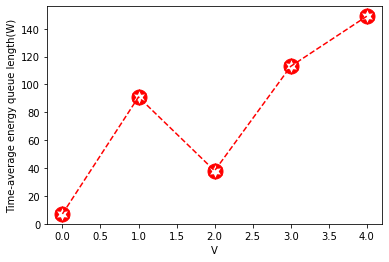

In [15]:
star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()

# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

plt.xlabel('V')
plt.ylabel('Time-average energy queue length(W)')
plt.plot(w_star[:5], '--r', marker=cut_star, markersize=15)

plt.show()

In [16]:
gt = []
for i in range(T):
    gt.append((lambda_ * mt[i]) + e)

In [17]:
h_n = np.random.uniform(8,15.5, T)

In [18]:
kt = [x for x in Kt]
ktt = copy.deepcopy(kt)
for i in range(N):
    for j in range(T):
        b_n = (c*rn[j]) + a_n[i]
        ktt.append((Kt[i] - b_n + h_n[j]) / 7) 

In [19]:
Wt = np.concatenate((mt, (np.array(m_n) /35)))

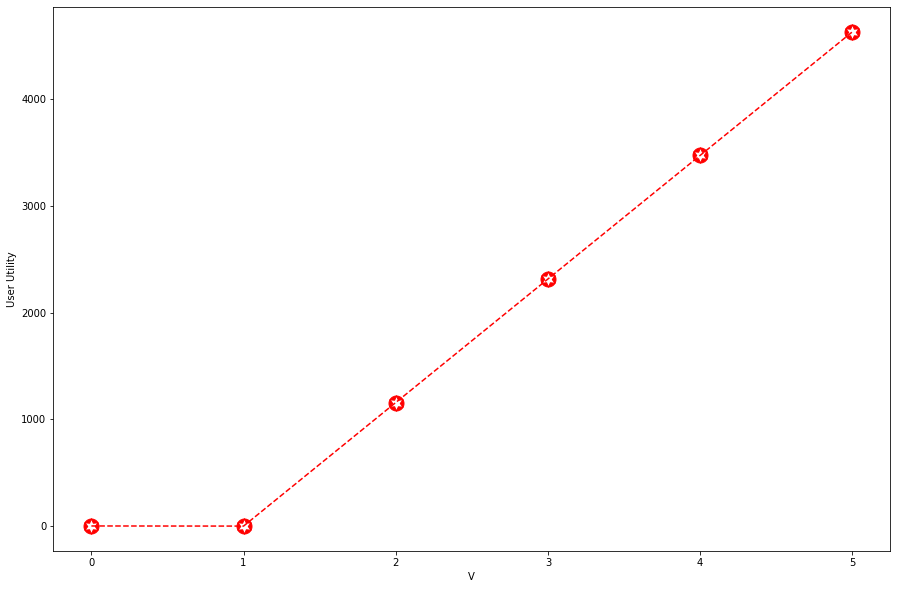

In [23]:
plt.rcParams["figure.figsize"] = (15,10)

star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()

# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

plt.xlabel('V')
plt.ylabel('User Utility')
plt.plot(Wt[::5000], '--r', marker=cut_star, markersize=15)

plt.show()